In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LinearRegression
import pandas as pd

Загружаем набор данных diabets

In [2]:
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

Выбираем подходящий столбец для линейной регрессии

In [34]:
correlations = [np.corrcoef(X[:, i], y)[0, 1] for i in range(X.shape[1])]
selected_feature = np.argmax(np.abs(correlations))
print(f"Выбран признак {diabetes.feature_names[selected_feature]} с корреляцией {correlations[selected_feature]:.3f}")
X_selected = X[:, selected_feature].reshape(-1, 1)

Выбран признак bmi с корреляцией 0.586


Реализуем метод линейной регрессии в Scikit-Learn

In [5]:
model = LinearRegression()
model.fit(X_selected, y)
slope_sk = model.coef_[0]
intercept_sk = model.intercept_

Реалезуем метод линейной регрессии, импользуя собственный алгоритм

In [35]:
def least_squares(x, y):
    n = len(x)
    sum_x = sum(x)
    sum_y = sum(y)
    sum_xx = sum(i**2 for i in x)
    sum_xy = sum(x[i] * y[i] for i in range(n))
    a = (n * sum_xy - sum_x * sum_y) / (n * sum_xx - sum_x**2)
    b = (sum_y - a * sum_x) / n
    return a, b

In [36]:
X_flatten = X_selected.flatten()
slope_my, intercept_my = least_squares(X_flatten, y)

Выведем значения коэффициентов

In [38]:
print("\nКоэффициенты:")
print(f"Scikit-Learn: slope = {slope_sk:.3f}, intercept = {intercept_sk:.3f}")
print(f"Собственная реализация: slope = {slope_my:.3f}, intercept = {intercept_my:.3f}")


Коэффициенты:
Scikit-Learn: slope = 949.435, intercept = 152.133
Собственная реализация: slope = 949.435, intercept = 152.133


Построим графики

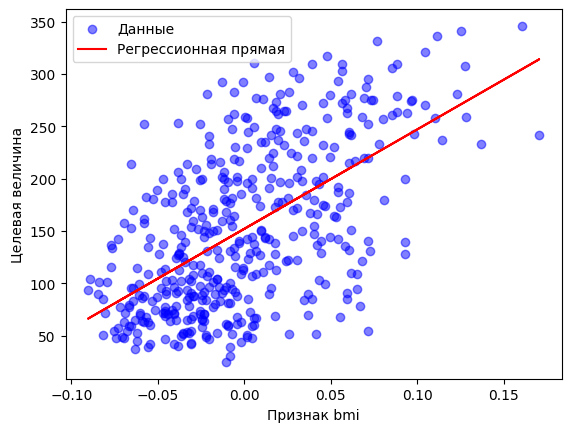

In [40]:
plt.scatter(X_flatten, y, color='blue', alpha=0.5, label='Данные')
plt.plot(X_flatten, model.predict(X_selected), color='red', label='Регрессионная прямая')
plt.xlabel(f'Признак {diabetes.feature_names[selected_feature]}')
plt.ylabel('Целевая величина')
plt.legend()
plt.show()

Выведем таблицу с результатами предсказаний

In [41]:
predictions = pd.DataFrame({
    'Scikit-Learn': model.predict(X_selected),
    'Собственный алгоритм': (intercept_my + slope_my * X_flatten)
})
predictions

,Scikit-Learn,Собственный алгоритм
0,210.710038,210.710038
1,103.262195,103.262195
2,194.337033,194.337033
3,141.124769,141.124769
4,117.588574,117.588574
...,...,...
437,170.800839,170.800839
438,137.031517,137.031517
439,137.031517,137.031517
440,189.220470,189.220470
